# Régression Linéaire Simple

Dans cet exemple, nous considérerons les ventes basées sur le budget marketing 'TV'.

Dans ce notebook, nous construirons un modèle de régression linéaire pour prédire les 'Ventes' en utilisant 'TV' comme variable prédictive.

## Compréhension des Données

Commençons par les étapes suivantes :

1. Importation des données en utilisant la bibliothèque pandas
2. Compréhension de la structure des données

In [77]:
import pandas as pd

In [79]:
advertising = pd.read_csv("tvmarketing.csv")

Maintenant, vérifions la structure du jeu de données advertising.

In [81]:
# Afficher les 5 premières lignes
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [83]:
# Afficher les 5 dernières lignes
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [15]:
# Vérifions les colonnes
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [85]:
# Vérifier la forme du DataFrame (lignes, colonnes)
advertising.shape

(200, 2)

In [87]:
# Examinons quelques informations statistiques sur le dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualisation des Données avec Seaborn

In [22]:
# Façon conventionnelle d'importer seaborn et matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Pour visualiser dans le notebook
#%matplotlib inline

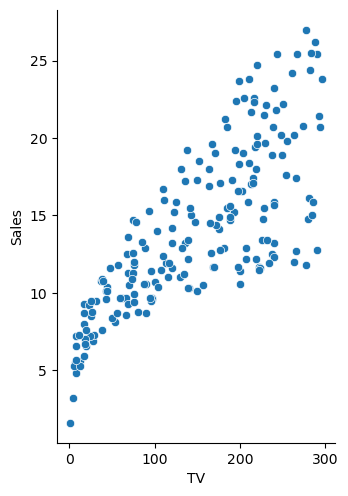

In [24]:
# Visualiser la relation entre les caractéristiques et la réponse en utilisant des nuages de points
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales',height=5, aspect=0.7, kind='scatter')
plt.show()

# Exécution de la Régression Linéaire Simple

Équation de la régression linéaire<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ est la réponse
-  $c$ est l'ordonnée à l'origine (intercept)
-  $m_1$ est le coefficient pour la première caractéristique
-  $m_n$ est le coefficient pour la nième caractéristique<br>

Dans notre cas:

$y = c + m_1 \times TV$

Les valeurs $m$ sont appelées les **coefficients** du modèle ou **paramètres du modèle**.


### Étapes Génériques dans la Construction de Modèle avec ```sklearn```


Avant de continuer, il est bon de comprendre la structure générique de la modélisation en utilisant la bibliothèque scikit-learn. Globalement, les étapes pour construire n'importe quel modèle peuvent être divisées comme suit :

## Préparation de X et y

- La bibliothèque scikit-learn attend que X (variable caractéristique) et y (variable réponse) soient des tableaux NumPy.

- Cependant, X peut être un dataframe car Pandas est construit sur NumPy.

In [33]:
# Mettre la variable caractéristique dans X
X = advertising['TV']

# Afficher les 5 premières lignes
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [35]:
# Mettre la variable réponse dans y
y = advertising['Sales']

# Afficher les 5 premières lignes
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Division des Données en Ensembles d'Entraînement et de Test

In [89]:
# random_state est la graine utilisée par le générateur de nombres aléatoires, elle peut être n'importe quel entier.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [40]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [42]:
train_test_split  

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [44]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [46]:
# C'est une convention générale dans scikit-learn que les observations sont des lignes, tandis que les caractéristiques sont des colonnes.
# Ceci n'est nécessaire que lorsque vous utilisez une seule caractéristique ; dans ce cas, 'TV'.
import numpy as np

X_train = X_train.values[:, np.newaxis]
X_test = X_test.values[:, np.newaxis]

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## Exécution de la Régression Linéaire

In [51]:
# importer LinearRegression de sklearn
from sklearn.linear_model import LinearRegression

# Représenter LinearRegression comme lr (Créer un objet LinearRegression)
lr = LinearRegression()

# Ajuster le modèle en utilisant lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Calcul des Coefficients

In [54]:
# Afficher l'ordonnée à l'origine et les coefficients
print(lr.intercept_)
print(lr.coef_)

6.98966585741168
[0.04649736]


$y = 6.989 + 0.0464 \times TV $<br>

Maintenant, utilisons cette équation pour prédire nos ventes.

## Prédictions

In [60]:
# Faire des prédictions sur l'ensemble de test
y_pred = lr.predict(X_test)

In [62]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values

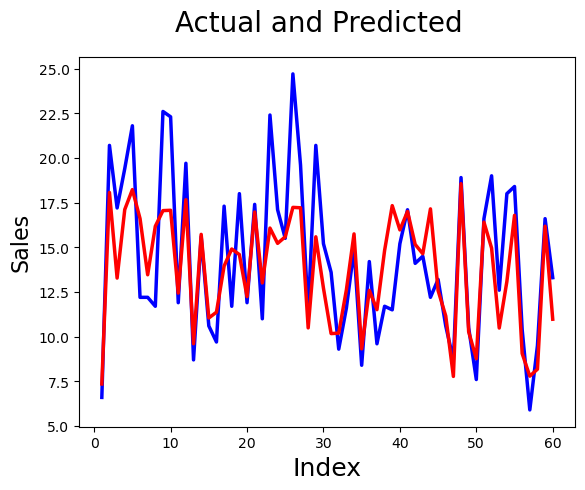

In [65]:
# Réel vs Prédit
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label
plt.show()

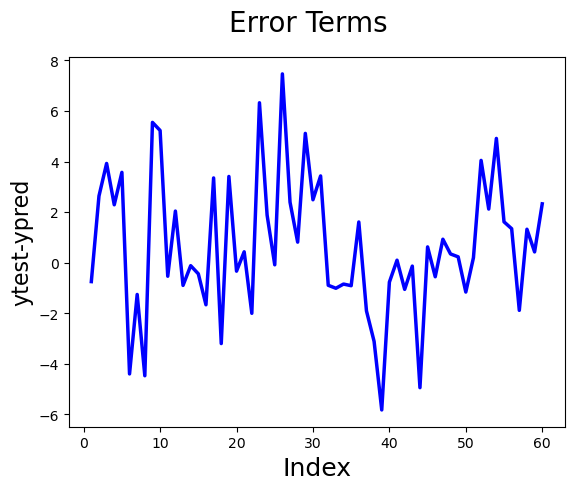

In [67]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

In [71]:
r_squared = r2_score(y_test, y_pred)

In [73]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.975798532854851
r_square_value : 0.5942987267783302


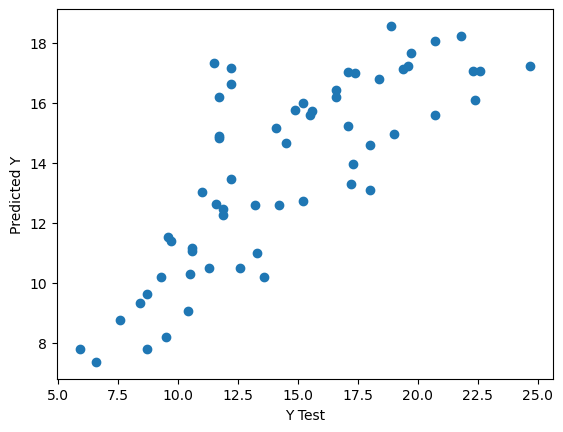

In [75]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()